In [2]:
t = (['A','B','C'], ['D','E','F'], ['G','H','I'])

In [3]:
t[0] = ['X','Y','Z'] # immutable

TypeError: 'tuple' object does not support item assignment

In [5]:
t[0][0] = 'X' # tuple is immutable but list inside tuple is mutable
t

(['X', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I'])

## Stack
- O(1) 연산

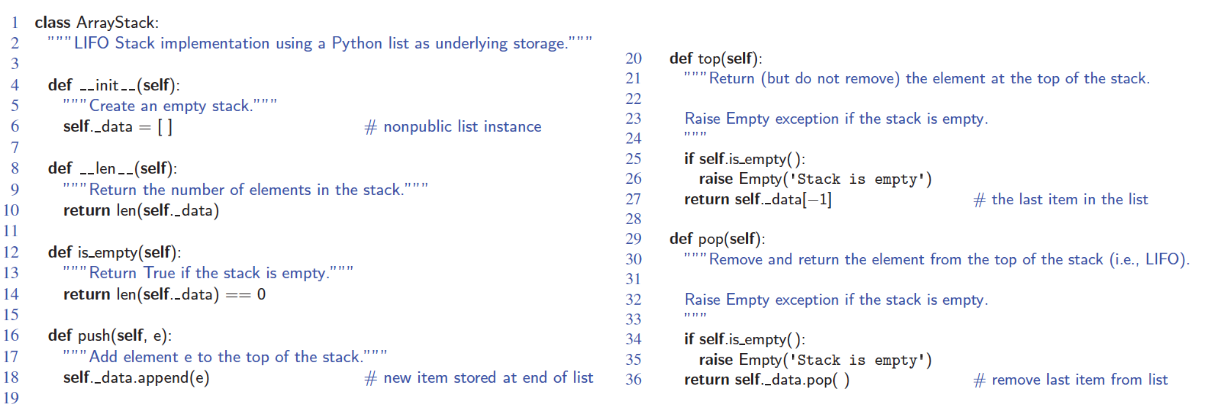
퀴즈

In [2]:
def push(stack, item):
    stack.append(item)
    return stack
def pop(stack):
    return stack.pop()
def is_empty(stack):
    return len(stack) == 0
stack = []
push(stack, 1)
push(stack, 2)
push(stack, 3)
print(stack)
print(pop(stack))
print(pop(stack))
print(pop(stack))
print(is_empty(stack))

[1, 2, 3]
3
2
1
True


### Expression evaluator
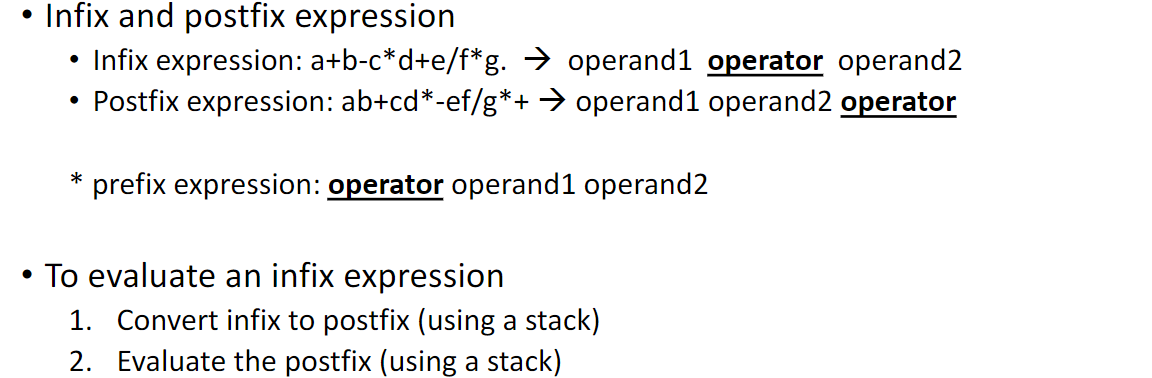
- Infix : a (연산자) b
    <br>ex\)1+2-3\*4+5/6\*7
- Postfix : ab (연산자)
    <br>ex\)12+34*-56/7*+

잘못된 수식이 들어오면 어떤 에러가 날까?

In [3]:
# convert infix to postfix
def infix_to_postfix(infix):
    precedence = {'+':1, '-':1, '*':2, '/':2, '^':3}
    stack = []
    postfix = []
    for char in infix:
        if char.isalnum():
            postfix.append(char)
        elif char == '(':
            stack.append(char)
        elif char == ')':
            while stack and stack[-1] != '(':
                postfix.append(stack.pop())
            stack.pop()
        else:
            while stack and precedence[stack[-1]] >= precedence[char]:
                postfix.append(stack.pop())
            stack.append(char)
    while stack:
        postfix.append(stack.pop())
    return ''.join(postfix)
infix_to_postfix('A+B*C-D*E')

'ABC*+DE*-'

In [6]:
# convert postfix to infix
def postfix_to_infix(postfix):
    stack = []
    for char in postfix:
        if char.isalnum():
            stack.append(char)
        else:
            op2 = stack.pop()
            op1 = stack.pop()
            stack.append('({}{}{})'.format(op1, char, op2))
    return stack.pop()
postfix_to_infix('ABC*+DE*-')

'((A+(B*C))-(D*E))'

## Queue
- O(n) 연산

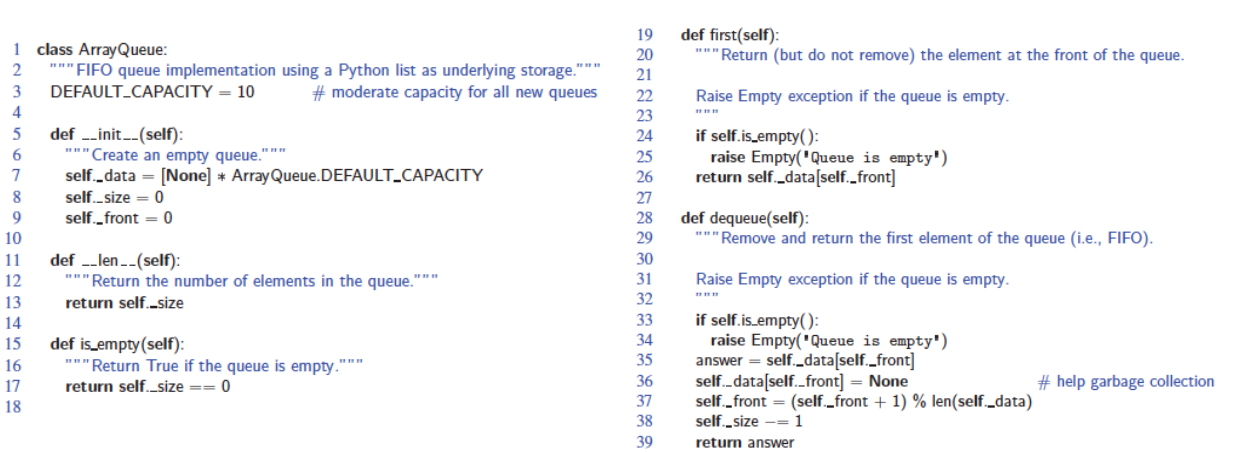

In [8]:
# Queue
class Queue:
    def __init__(self):
        self.queue = []
    def enqueue(self, item):
        self.queue.append(item)
    def dequeue(self):
        return self.queue.pop(0)
    def is_empty(self):
        return len(self.queue) == 0
array = Queue()
array.enqueue(1)
array.enqueue(2)
array.enqueue(3)
print(array.queue)
print(array.dequeue(), array.queue)
print(array.dequeue(), array.queue)
print(array.dequeue(), array.queue)

[1, 2, 3]
1 [2, 3]
2 [3]
3 []
